<a href="https://colab.research.google.com/github/viwaumich/stat_programming/blob/main/hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")
remotes::install_github("bradleyboehmke/harrypotter")
install.packages("tidytext")
library(tidyverse)
library(stringr)
options(jupyter.rich_display=T)
library(harrypotter)
library(tidytext)
options(repr.plot.width=4, repr.plot.height=3)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Skipping install of 'harrypotter' from a github remote, the SHA1 (51f71461) has not changed since last install.
  Use `force = TRUE` to force installation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# STATS 306
## Homework 7: Text Analysis

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Sentiment Analysis (4 points)

In problem 1 we will perform *sentiment analysis* of the Harry Potter books. The file `afinn.RData` contains a sentiment score for a large number of words in the English language:

In [ ]:
load(url("https://datasets.stats306.org/afinn.RData"))
head(afinn)

word,value
<chr>,<dbl>
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2


Negatively connoted words receive low scores, while positively connoted words receive high scores:

In [ ]:
filter(afinn, word %in% c("death", "hurrah"))

word,value
<chr>,<dbl>
death,-2
hurrah,5


The `tidytext::unnest_tokens()` function can be used to break a chunk of text into "tokens" (words, sentences, etc.) It works as follows. Consider the following tibble, which contains all 17 chapters of the first book in the Harry Potter series:

In [ ]:
phil_tbl <- tibble(chapter=seq_along(philosophers_stone),
                   text=philosophers_stone) %>% print

# A tibble: 17 × 2
   chapter text                                                                 
     <int> <chr>                                                                
 1       1 "THE BOY WHO LIVED　　Mr. and Mrs. Dursley, of number four, Privet D…
 2       2 "THE VANISHING GLASS　　Nearly ten years had passed since the Dursle…
 3       3 "THE LETTERS FROM NO ONE　　The escape of the Brazilian boa constric…
 4       4 "THE KEEPER OF THE KEYS　　BOOM. They knocked again. Dudley jerked a…
 5       5 "DIAGON ALLEY　　Harry woke early the next morning. Although he coul…
 6       6 "THE JOURNEY FROM PLATFORM NINE AND THREE-QUARTERS　　Harry's last m…
 7       7 "THE SORTING HAT　　The door swung open at once. A tall, black-haire…
 8       8 "THE POTIONS MASTER　　There, look.\"　　\"Where?\"　　\"Next to the…
 9       9 "THE MIDNIGHT DUEL　　Harry had never believed he would meet a boy h…
10      10 "HALLOWEEN　　Malfoy couldn't believe his eyes when he saw that Harr…
11      11 "QUIDDITCH　　As they en

To perform sentiment analysis, we need to break each chapter into words so that we can join it to the `afinn` table. This is what `unnest_tokens()` does:

In [ ]:
phil_tok <- unnest_tokens(phil_tbl, input=text, output=word) %>% print

# A tibble: 77,875 × 2
   chapter word   
     <int> <chr>  
 1       1 the    
 2       1 boy    
 3       1 who    
 4       1 lived  
 5       1 mr     
 6       1 and    
 7       1 mrs    
 8       1 dursley
 9       1 of     
10       1 number 
# … with 77,865 more rows


**1(a)** By joining this table to other tables containing text data and summarizing, we can generate scores of how positive or negative the text is. Using the table and `afinn`, we can assign sentiment scores to various portions of text. Generate a plot reflecting how the sentiment changes over 17 chapters of the first book in the Harry Potter series. What conclusion can you draw from the plot? (1 point)

In [ ]:
### YOUR SOLUTION HERE
senti_phil <- phil_tok %>%
  left_join(afinn, by = join_by(word)) %>%
  filter(!is.na(value)) %>%
  group_by(chapter) %>%
  summarize(mean_sentiment = mean(value))

senti_phil$chapter <- as.factor(senti_phil$chapter)

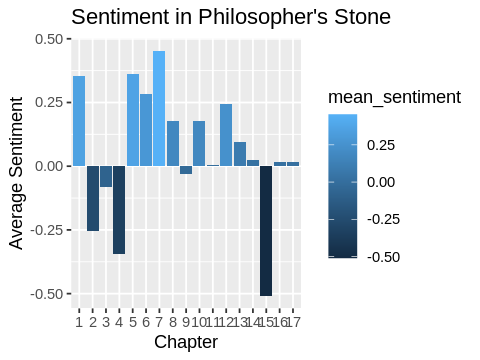

In [ ]:
senti_phil %>%
  ggplot(aes(x=chapter, y=mean_sentiment, fill = mean_sentiment)) +
    geom_bar(stat='identity', position='dodge') +
    xlab("Chapter") + ylab("Average Sentiment") + labs(title = "Sentiment in Philosopher's Stone")

**Overall, there is no clear progression in sentiment over the course of the book. Most of the Philosopher's Stone is relatively positive, except for Chapters 2-4. Only Chapter 15 is significantly negative.**

**1(b)**
Some people say that the Harry Potter books became darker (more negative) over time. Use sentiment analysis to investigate this, and report your conclusion here. (1 point)

**HINT**: A list of all the Harry Potter books can be obtained by looking at the help page for the `harrypotter` package.

In [ ]:
### YOUR SOLUTION HERE
phil_stone <- tibble(chapter = seq_along(philosophers_stone),
                    text = philosophers_stone)
phil_stone <- unnest_tokens(phil_stone, word, text)
phil_stone <- phil_stone %>%
  mutate(book = "philosophers_stone") %>%
  group_by(book) %>%
  left_join(afinn, by = join_by(word)) %>%
  filter(!is.na(value)) %>%
  summarize(mean_sentiment = mean(value))

chamb_sec <- tibble(chapter = seq_along(chamber_of_secrets),
                    text = chamber_of_secrets)
chamb_sec <- unnest_tokens(chamb_sec, word, text)
chamb_sec <- chamb_sec %>%
  mutate(book = "chamber_of_secrets") %>%
  group_by(book) %>%
  left_join(afinn, by = join_by(word)) %>%
  filter(!is.na(value)) %>%
  summarize(mean_sentiment = mean(value))

pris_azk <- tibble(chapter = seq_along(prisoner_of_azkaban),
                    text = prisoner_of_azkaban)
pris_azk <- unnest_tokens(pris_azk, word, text)
pris_azk <- pris_azk %>%
  mutate(book = "prisoner_of_azkaban") %>%
  group_by(book) %>%
  left_join(afinn, by = join_by(word)) %>%
  filter(!is.na(value)) %>%
  summarize(mean_sentiment = mean(value))

gob_fire <- tibble(chapter = seq_along(goblet_of_fire),
                    text = goblet_of_fire)
gob_fire <- unnest_tokens(gob_fire, word, text)
gob_fire <- gob_fire %>%
  mutate(book = "goblet_of_fire") %>%
  group_by(book) %>%
  left_join(afinn, by = join_by(word)) %>%
  filter(!is.na(value)) %>%
  summarize(mean_sentiment = mean(value))

ord_phoe <- tibble(chapter = seq_along(order_of_the_phoenix),
                    text = order_of_the_phoenix)
ord_phoe <- unnest_tokens(ord_phoe, word, text)
ord_phoe <- ord_phoe %>%
  mutate(book = "order_of_the_phoenix") %>%
  group_by(book) %>%
  left_join(afinn, by = join_by(word)) %>%
  filter(!is.na(value)) %>%
  summarize(mean_sentiment = mean(value))

half_prnc <- tibble(chapter = seq_along(half_blood_prince),
                    text = half_blood_prince)
half_prnc <- unnest_tokens(half_prnc, word, text)
half_prnc <- half_prnc %>%
  mutate(book = "half_blood_prince") %>%
  group_by(book) %>%
  left_join(afinn, by = join_by(word)) %>%
  filter(!is.na(value)) %>%
  summarize(mean_sentiment = mean(value))

dth_hal <- tibble(chapter = seq_along(deathly_hallows),
                    text = deathly_hallows)
dth_hal <- unnest_tokens(dth_hal, word, text)
dth_hal <- dth_hal %>%
  mutate(book = "deathly_hallows") %>%
  group_by(book) %>%
  left_join(afinn, by = join_by(word)) %>%
  filter(!is.na(value)) %>%
  summarize(mean_sentiment = mean(value))

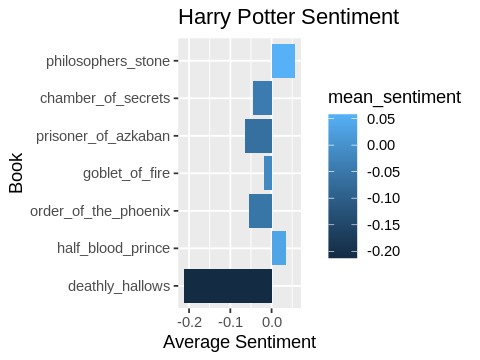

In [ ]:
all <- rbind(phil_stone, chamb_sec, pris_azk, gob_fire, ord_phoe, half_prnc, dth_hal)
all$book <- factor(all$book, levels=c('deathly_hallows',
                                'half_blood_prince',
                                'order_of_the_phoenix',
                                'goblet_of_fire',
                                'prisoner_of_azkaban',
                                'chamber_of_secrets',
                                'philosophers_stone'))
all %>%
  ggplot(aes(book, mean_sentiment, fill = mean_sentiment)) +
    geom_col() +
    coord_flip() +
    xlab("Book") + ylab("Average Sentiment") + labs(title = "Harry Potter Sentiment")


**There does not seem to be a clear downward trend in sentiment over the progression of the series. However, Deathly Hallows is clearly the most negative, and Philosopher's Stone was more optimistic overall.**

**1(c)** According to the sentiment scores, what are the most negative and positive chapters in any of the Harry Potter books? (1 point)

In [ ]:
### YOUR SOLUTION HERE
phil_stone <- tibble(chapter = seq_along(philosophers_stone),
                    text = philosophers_stone)
phil_stone <- unnest_tokens(phil_stone, word, text)
phil_stone <- phil_stone %>%
  mutate(book = "philosophers_stone") %>%
  group_by(chapter) %>%
  left_join(afinn, by = join_by(word)) %>%
  filter(!is.na(value)) %>%
  mutate(mean_sentiment = mean(value))

chamb_sec <- tibble(chapter = seq_along(chamber_of_secrets),
                    text = chamber_of_secrets)
chamb_sec <- unnest_tokens(chamb_sec, word, text)
chamb_sec <- chamb_sec %>%
  mutate(book = "chamber_of_secrets") %>%
  group_by(chapter) %>%
  left_join(afinn, by = join_by(word)) %>%
  filter(!is.na(value)) %>%
  mutate(mean_sentiment = mean(value))

pris_azk <- tibble(chapter = seq_along(prisoner_of_azkaban),
                    text = prisoner_of_azkaban)
pris_azk <- unnest_tokens(pris_azk, word, text)
pris_azk <- pris_azk %>%
  mutate(book = "prisoner_of_azkaban") %>%
  group_by(chapter) %>%
  left_join(afinn, by = join_by(word)) %>%
  filter(!is.na(value)) %>%
  mutate(mean_sentiment = mean(value))

gob_fire <- tibble(chapter = seq_along(goblet_of_fire),
                    text = goblet_of_fire)
gob_fire <- unnest_tokens(gob_fire, word, text)
gob_fire <- gob_fire %>%
  mutate(book = "goblet_of_fire") %>%
  group_by(chapter) %>%
  left_join(afinn, by = join_by(word)) %>%
  filter(!is.na(value)) %>%
  mutate(mean_sentiment = mean(value))

ord_phoe <- tibble(chapter = seq_along(order_of_the_phoenix),
                    text = order_of_the_phoenix)
ord_phoe <- unnest_tokens(ord_phoe, word, text)
ord_phoe <- ord_phoe %>%
  mutate(book = "order_of_the_phoenix") %>%
  group_by(chapter) %>%
  left_join(afinn, by = join_by(word)) %>%
  filter(!is.na(value)) %>%
  mutate(mean_sentiment = mean(value))

half_prnc <- tibble(chapter = seq_along(half_blood_prince),
                    text = half_blood_prince)
half_prnc <- unnest_tokens(half_prnc, word, text)
half_prnc <- half_prnc %>%
  mutate(book = "half_blood_prince") %>%
  group_by(chapter) %>%
  left_join(afinn, by = join_by(word)) %>%
  filter(!is.na(value)) %>%
  mutate(mean_sentiment = mean(value))

dth_hal <- tibble(chapter = seq_along(deathly_hallows),
                    text = deathly_hallows)
dth_hal <- unnest_tokens(dth_hal, word, text)
dth_hal <- dth_hal %>%
  mutate(book = "deathly_hallows") %>%
  group_by(chapter) %>%
  left_join(afinn, by = join_by(word)) %>%
  filter(!is.na(value)) %>%
  mutate(mean_sentiment = mean(value))


all_chapters <- rbind(phil_stone, chamb_sec, pris_azk, gob_fire, ord_phoe, half_prnc, dth_hal)
all_chapters %>%
  select(book, chapter, mean_sentiment) %>%
  arrange(mean_sentiment) %>%
  head(1)
all_chapters %>%
  select(book, chapter, mean_sentiment) %>%
  arrange(mean_sentiment) %>%
  tail(1)

book,chapter,mean_sentiment
<chr>,<int>,<dbl>
half_blood_prince,28,-1.142857


book,chapter,mean_sentiment
<chr>,<int>,<dbl>
half_blood_prince,9,0.6862745


**Most Negative Chapter in any HP Book:** Half Blood Prince, Ch. 28

---
**Most Positive Chapter in any HP Book:** Half Blood Prince, Ch. 9


**1(d)** Of the sentences that contain three or more scored words, what is the happiest (most positive)? (1 points)

In [ ]:
harryp <- rbind(philosophers_stone,
                chamber_of_secrets,
                prisoner_of_azkaban,
                goblet_of_fire,
                order_of_the_phoenix,
                half_blood_prince,
                deathly_hallows) %>%
          str_replace_all(regex("Prof.|Mrs.|Mr.|Ms."), "msc_ttl")

harryp <- tibble(text = harryp) %>%
  mutate(text = str_replace_all(text, "\\n", "")) %>%
  unnest_tokens(output = text, input = text, token = "sentences", drop = F, to_lower = F) %>%
    mutate(sentence_id = seq_along(text))

hp_words <- harryp %>%
  unnest_tokens(word, text)

harryp <- harryp %>%
  left_join(hp_words, join_by(sentence_id)) %>%
  left_join(afinn, join_by(word)) %>%
  filter(!is.na(value)) %>%
  group_by(text) %>%
  mutate(mean_sent = mean(value))

counts <- harryp %>%
  count(sentence_id)

harryp %>%
  left_join(counts, join_by(sentence_id, text)) %>%
  filter(n >= 3) %>%
  arrange(desc(mean_sent)) %>%
  head()

Warning message in rbind(philosophers_stone, chamber_of_secrets, prisoner_of_azkaban, :
“number of columns of result is not a multiple of vector length (arg 1)”
Warning message in left_join(., hp_words, join_by(sentence_id)):
“Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 1 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this
  warning.”


text,sentence_id,word,value,mean_sent,n
<chr>,<int>,<chr>,<dbl>,<dbl>,<int>
"Maniacal laughter was ringing in his ears . . . he was happier than he had been in a very long time . . . jubilant, ecstatic, triumphant . . . a wonderful, wonderful thing had happened . . .",64711,jubilant,3,3.800000,5
"Maniacal laughter was ringing in his ears . . . he was happier than he had been in a very long time . . . jubilant, ecstatic, triumphant . . . a wonderful, wonderful thing had happened . . .",64711,ecstatic,4,3.800000,5
"Maniacal laughter was ringing in his ears . . . he was happier than he had been in a very long time . . . jubilant, ecstatic, triumphant . . . a wonderful, wonderful thing had happened . . .",64711,triumphant,4,3.800000,5
"Maniacal laughter was ringing in his ears . . . he was happier than he had been in a very long time . . . jubilant, ecstatic, triumphant . . . a wonderful, wonderful thing had happened . . .",64711,wonderful,4,3.800000,5
"Maniacal laughter was ringing in his ears . . . he was happier than he had been in a very long time . . . jubilant, ecstatic, triumphant . . . a wonderful, wonderful thing had happened . . .",64711,wonderful,4,3.800000,5
"'But Ginny was best, she got Malfoy - Bat Bogey Hex - it was superb, his whole face was covered in the great flapping things.",89946,best,3,3.666667,3


**"Maniacal laughter was ringing in his ears . . . he was happier than he had been in a very long time . . . jubilant, ecstatic, triumphant . . . a wonderful, wonderful thing had happened . . .	" This sentence has an average sentence sentiment of 3.8 and contains 5 words that were indexed in the "afinn" dataset.**

## Problem 2: Reddit dataset (4 points)
The file `reddit_xmas_2017.RData` contains 100,000 comments posted to Reddit on Christmas Day, 2017. Unless specified otherwise, all matches are case insensitive.

In [ ]:
load(url('https://datasets.stats306.org/reddit_xmas_2017.RData'))
reddit %>% print

# A tibble: 100,000 × 3
   author              body                                  created_utc        
   <chr>               <chr>                                 <dttm>             
 1 br_shadow           "Thank you for this, there is a pers… 2017-12-25 15:49:08
 2 Ksalol              "They are not to quick actually. It'… 2017-12-25 17:42:50
 3 itscool83           "tell her you guys should hang out w… 2017-12-25 18:54:13
 4 Glu7enFree          "Autism is a high honor in the tech … 2017-12-25 07:48:17
 5 Theotheogreato      "You thought a cat was your son?! "   2017-12-25 20:58:08
 6 Shadrac121          "Hopfully she takes wat people say i… 2017-12-25 22:27:31
 7 1fzUjhemoSB1QV7zI7  "Si ce propui sa facem cu toata piel… 2017-12-25 07:41:31
 8 MinisterOfEducation "I don't mean to be impolite, but if… 2017-12-25 19:28:35
 9 AabidS10            "i dont have a 720p x265 of it, sorr… 2017-12-25 13:20:32
10 S3RG10              "I'm dying to try Guatemalan sandals… 2017-12-25 00:48:46
# … 

Comment 174 wishes everyone a happy holidays:

In [ ]:
reddit %>% slice(174)

author,body,created_utc
<chr>,<chr>,<dttm>
Bareilles,Thank you. Happy holidays everyone!,2017-12-25 01:33:50


**2(a)**  What are other people wishing? Count the first occurrence of the string "Happy `<word>`" or "Merry `<word>`" in the comment body, if any, count the matches. To keep things interesting, do *not* include phrases matching `(happy|merry) (to|with|for|about|and|that|if|i|you|when)`.

Print a table containing the top 10 matches; a few of the rows are:

<table>
<thead>
    <tr><th scope="col">greeting</th><th scope="col">n</th></tr>
    <tr><th scope="col">&lt;chr&gt;</th><th scope="col">&lt;int&gt;</th></tr>
</thead>
<tbody>
    <tr><td>merry christmas</td><td>2040</td></tr>
    <tr><td>happy holidays </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td>   7</td></tr>
    <tr><td>happy cakeday  </td><td>   6</td></tr>
</tbody>
</table>

Your numbers may vary slightly depending on how you performed the match.

In [ ]:
### YOUR SOLUTION HERE
reddit %>%
  mutate(lowercase = tolower(body)) %>%
  mutate(greeting = str_extract(lowercase, "[Hh]appy\\s\\w+|[Mm]erry\\s\\w+")) %>%
  filter(greeting != "happy to" & greeting != "merry to" &
         greeting != "happy with" & greeting != "merry with" &
         greeting != "happy for" & greeting != "merry for" &
         greeting != "happy about" & greeting != "merry about" &
         greeting != "happy and" & greeting != "merry and" &
         greeting != "happy that" & greeting != "merry that" &
         greeting != "happy if" & greeting != "merry if" &
         greeting != "happy i" & greeting != "merry i" &
         greeting != "happy you" & greeting != "merry you" &
         greeting != "happy when" & greeting != "merry when") %>%
  filter(!is.na(greeting)) %>%
  count(greeting) %>%
  arrange(desc(n)) %>% head(10)

greeting,n
<chr>,<int>
merry christmas,2040
happy holidays,477
merry xmas,93
happy christmas,44
happy cake,28
happy birthday,23
happy new,15
happy holiday,13
merry x,7


**2(b)** Find the number of times `christmas`or `xmas` mentioned each hour. Similarly, find the number of mentions per hour of `snow` or `flakes`. Draw a plot comparing these two time series. (1 point)

In [ ]:
library(lubridate)

`summarise()` has grouped output by 'yearmonthday'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'yearmonthday'. You can override using the
`.groups` argument.


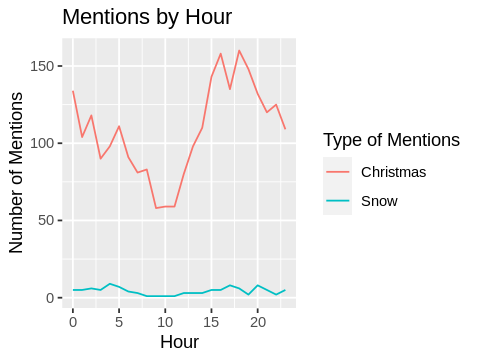

In [ ]:
christmas <- reddit %>%
  mutate(xmas_mentions = str_extract(body, "Christmas | christmas | Xmas | xmas")) %>%
  drop_na(xmas_mentions) %>%
  mutate(hour = hour(created_utc)) %>%
  mutate(yearmonthday = date(created_utc)) %>%
  group_by(yearmonthday, hour) %>%
  count(xmas_mentions) %>%
  summarize(mentions = sum(n)) %>%
  mutate(mention_type = "christmas")

snow <- reddit %>%
  mutate(snow_mentions = str_extract(body, "snow | Snow | flakes | Flakes")) %>%
  drop_na(snow_mentions) %>%
  mutate(hour = hour(created_utc)) %>%
  mutate(yearmonthday = date(created_utc)) %>%
  group_by(yearmonthday, hour) %>%
  count(snow_mentions) %>%
  summarize(mentions = sum(n)) %>%
  mutate(mention_type = "snow")

new_df <- rbind(christmas, snow)

new_df %>%
  ggplot(aes(x = hour, y = mentions, color = mention_type)) +
    geom_line() + labs(title = "Mentions by Hour") +
    xlab("Hour") + ylab("Number of Mentions") + scale_color_discrete(name = "Type of Mentions",
                       labels = c("Christmas", "Snow"))

**2(c)** On Christmas Day, the word `christmas` occurs 4264 times. What is the next most common word after Christmas, and how many times does it appear? (1 point)

In [ ]:
### YOUR SOLUTION HERE
comment_words <- reddit %>%
                    unnest_tokens(word, body)

comment_words %>%
  count(word) %>%
  filter(n <= 4300) %>%
  arrange(desc(n)) %>%
  head(2)

word,n
<chr>,<int>
christmas,4259
only,4151


**The next most common word after "christmas" on Christmas day was "only" with 4151 occurrences.**

**2(d)** Using `afinn` dataset, calculate the average sentiment scores of reddit comments for each hour. When is the most positive time in Christmas Day? (1 point)

In [ ]:
### YOUR SOLUTION HERE
comment_words %>%
  mutate(hour = hour(created_utc)) %>%
  left_join(afinn, join_by(word)) %>%
  drop_na(value) %>%
  group_by(hour) %>%
  summarize(avg_sentiment = mean(value)) %>%
  arrange(desc(avg_sentiment))

hour,avg_sentiment
<int>,<dbl>
4,0.9891790
5,0.9697171
21,0.9642078
14,0.9584906
11,0.9511098
19,0.9363501
13,0.9325351
0,0.9318977
3,0.9298659


**Hour 4 on Christmas Day was the most positive time, with an average sentiment score of 0.989.**

## Challenge Problem: Text Ranking (2 points)
Not all terms/words are equally important, and some carry more information about contents. But how do we measure the importance? One popular method is using TF-IDF (term frequency–inverse document frequency). TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection. Term Frequency measures the relative frequency of term within document. Inverse Document Frequency measures of how much information the word provides for the collection.

We defined TF-IDF as:
$$\text{TF-IDF} = \operatorname{TF}(t,d) \times \operatorname{IDF}(t)$$
$$\operatorname{TF}(t, d) = \log(1+c(t,d))$$
$$\operatorname{IDF}(t) = 1 + \log(N/k)$$
where $c(t,d)$ is the frequency count of term $t$ in document $d$, $N$ is the total number of documents in the collection, $k$ is the number
of documents containing term $t$


**(a)** Consider the Harry Potter series as a collection of documents(books), find top 5 words in each book ranked by TF-IDF. Comment on your finding. (1 point)

_Hint_: You can either compute this by hand, using the definitions shown above, or employ built-in functions in the `tidytext` package.

In [ ]:
install.packages("tidytext")
library(tidytext)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#YOUR SOLUTION HERE
hpwords <- chapter_words %>%
  left_join(chapter_data, join_by(sentence_id, book, chapter))

total_usage_counts <- hpwords %>%
  select(book, word) %>%
  count(word) %>%
  arrange(desc(n))

usage_per_book <- hpwords %>%
  group_by(book) %>%
  select(book, word) %>%
  count(word) %>%
  arrange(desc(n))

dataframe <- usage_per_book %>%
  left_join(total_usage_counts, join_by(word))

hp_tf_idf <- dataframe %>%
  bind_tf_idf(word, book, n.x)

hp_tf_idf$book <- factor(hp_tf_idf$book, levels = c("philosophers_stone", "chamber_of_secrets", "prisoner_of_azkaban", "goblet_of_fire", "order_of_the_phoenix", "half_blood_prince", "deathly_hallows"))

hp_tf_idf %>%
  arrange(desc(tf_idf)) %>%
  group_by(book) %>%
  slice(1:5) %>%
  select(book, word, tf_idf)

book,word,tf_idf
<fct>,<chr>,<dbl>
philosophers_stone,quirrell,0.0006467387
philosophers_stone,mom,0.0004247839
philosophers_stone,flamel,0.0004021659
philosophers_stone,quirrell's,0.0003539060
philosophers_stone,nicolas,0.0002573862
chamber_of_secrets,lockhart,0.0012907961
chamber_of_secrets,gilderoy,0.0005573833
chamber_of_secrets,dobby,0.0005476026
chamber_of_secrets,myrtle,0.0004662678


**I notice that a large majority of these words with a highest TF-IDF value are names of minor Harry Potter characters. This may be because these words are very unique and are less likely to be found throughout all seven books consistently as they are less relevant to the plot when compared to people like Harry Potter or Dumbledore.**

**(b)** Stop words are a set of commonly used words in a language like "the", "of", "and", "to", "a". The `stop_words` table contains a list of such words. If you ignore all the words in `stop_words`, what are the top 10 words (again ranked by TF-IDF) in each Harry Potter book? (1 point)

_Hint_: use `anti_join` to exclude words in `stop_words`.

In [ ]:
### YOUR SOLUTION HERE
hpwords <- chapter_words %>%
  left_join(chapter_data, join_by(sentence_id, book, chapter))

total_usage_counts <- hpwords %>%
  select(book, word) %>%
  count(word) %>%
  arrange(desc(n))

usage_per_book <- hpwords %>%
  group_by(book) %>%
  select(book, word) %>%
  count(word) %>%
  arrange(desc(n))

dataframe <- usage_per_book %>%
  left_join(total_usage_counts, join_by(word))

hp_tf_idf <- dataframe %>%
  bind_tf_idf(word, book, n.x)

hp_tf_idf$book <- factor(hp_tf_idf$book, levels = c("philosophers_stone", "chamber_of_secrets", "prisoner_of_azkaban", "goblet_of_fire", "order_of_the_phoenix", "half_blood_prince", "deathly_hallows"))

hp_tf_idf <- hp_tf_idf %>%
  anti_join(stop_words, join_by(word))

PS <- hp_tf_idf %>%
  arrange(desc(tf_idf)) %>%
  group_by(book) %>%
  slice(1:10) %>%
  select(book, word, tf_idf) %>%
  filter(book == "philosophers_stone")

COS <- hp_tf_idf %>%
  arrange(desc(tf_idf)) %>%
  group_by(book) %>%
  slice(1:10) %>%
  select(book, word, tf_idf) %>%
  filter(book == "chamber_of_secrets")

POA <- hp_tf_idf %>%
  arrange(desc(tf_idf)) %>%
  group_by(book) %>%
  slice(1:10) %>%
  select(book, word, tf_idf) %>%
  filter(book == "prisoner_of_azkaban")

GOF <- hp_tf_idf %>%
  arrange(desc(tf_idf)) %>%
  group_by(book) %>%
  slice(1:10) %>%
  select(book, word, tf_idf) %>%
  filter(book == "goblet_of_fire")

OOTF <- hp_tf_idf %>%
  arrange(desc(tf_idf)) %>%
  group_by(book) %>%
  slice(1:10) %>%
  select(book, word, tf_idf) %>%
  filter(book == "order_of_the_phoenix")

HBP <- hp_tf_idf %>%
  arrange(desc(tf_idf)) %>%
  group_by(book) %>%
  slice(1:10) %>%
  select(book, word, tf_idf) %>%
  filter(book == "half_blood_prince")

DH <- hp_tf_idf %>%
  arrange(desc(tf_idf)) %>%
  group_by(book) %>%
  slice(1:10) %>%
  select(book, word, tf_idf) %>%
  filter(book == "deathly_hallows")

PS
COS
POA
GOF
OOTF
HBP
DH

book,word,tf_idf
<fct>,<chr>,<dbl>
philosophers_stone,quirrell,0.0006467387
philosophers_stone,mom,0.0004247839
philosophers_stone,flamel,0.0004021659
philosophers_stone,quirrell's,0.0003539060
philosophers_stone,nicolas,0.0002573862
philosophers_stone,piers,0.0002412996
philosophers_stone,turban,0.0002252129
philosophers_stone,ronan,0.0002176018
philosophers_stone,chessmen,0.0001998983


book,word,tf_idf
<fct>,<chr>,<dbl>
chamber_of_secrets,lockhart,0.0012907961
chamber_of_secrets,gilderoy,0.0005573833
chamber_of_secrets,dobby,0.0005476026
chamber_of_secrets,myrtle,0.0004662678
chamber_of_secrets,riddle,0.0003978983
chamber_of_secrets,lockhart's,0.0003571413
chamber_of_secrets,riddle's,0.0003273795
chamber_of_secrets,kwikspell,0.0002734044
chamber_of_secrets,stall,0.0002734044


book,word,tf_idf
<fct>,<chr>,<dbl>
prisoner_of_azkaban,lupin,0.0011791915
prisoner_of_azkaban,pettigrew,0.0007081537
prisoner_of_azkaban,marge,0.0004184545
prisoner_of_azkaban,black's,0.0003782185
prisoner_of_azkaban,scabbers,0.0003387379
prisoner_of_azkaban,dementors,0.0003035859
prisoner_of_azkaban,boggart,0.0002896992
prisoner_of_azkaban,crookshanks,0.0002876077
prisoner_of_azkaban,ern,0.0002855544


book,word,tf_idf
<fct>,<chr>,<dbl>
goblet_of_fire,bagman,0.0013576124
goblet_of_fire,winky,0.0009464125
goblet_of_fire,champions,0.0008516196
goblet_of_fire,ludo,0.0007198213
goblet_of_fire,karkaroff,0.0006224418
goblet_of_fire,krum,0.0005539711
goblet_of_fire,moody,0.0005416906
goblet_of_fire,maxime,0.0004105468
goblet_of_fire,cedric,0.0003944349


book,word,tf_idf
<fct>,<chr>,<dbl>
order_of_the_phoenix,umbridge,0.0016237090
order_of_the_phoenix,defence,0.0004962004
order_of_the_phoenix,luna,0.0004550314
order_of_the_phoenix,umbridge's,0.0003533314
order_of_the_phoenix,sirius,0.0003507932
order_of_the_phoenix,tonks,0.0003306343
order_of_the_phoenix,kreacher,0.0003273607
order_of_the_phoenix,realised,0.0002420078
order_of_the_phoenix,forwards,0.0002226053


book,word,tf_idf
<fct>,<chr>,<dbl>
half_blood_prince,slughorn,0.0024896970
half_blood_prince,mclaggen,0.0007371559
half_blood_prince,morfin,0.0006464290
half_blood_prince,slughorn's,0.0006010656
half_blood_prince,quot,0.0004876570
half_blood_prince,ogden,0.0004453710
half_blood_prince,felix,0.0003515667
half_blood_prince,merope,0.0003515667
half_blood_prince,scrimgeour,0.0003506046


book,word,tf_idf
<fct>,<chr>,<dbl>
deathly_hallows,xenophilius,0.0008281464
deathly_hallows,griphook,0.0007526890
deathly_hallows,hallows,0.0006527742
deathly_hallows,horcrux,0.0005833339
deathly_hallows,luna,0.0005218031
deathly_hallows,kreacher,0.0005175608
deathly_hallows,greyback,0.0004202513
deathly_hallows,ariana,0.0004092017
deathly_hallows,diadem,0.0004092017


**It makes sense that our top TF-IDF words are still minor characters with unique names because Stop Words have very low TF-IDFs due to their common occurrences in written language. As a result, they would not have been in the Top 10 highest TF-IDF words regardless of their inclusion in our analysis.**